![title](/media/lnr-ai/christo/github_repos/mcb/img/Screenshot from 2020-03-10 05-52-40.png)

```
From github: git clone https://github.com/ChristoGH/mcb.git
```

In [1]:
%matplotlib inline

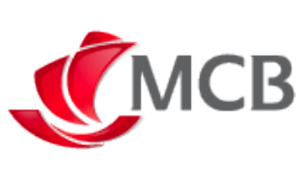

In [2]:
from IPython.display import Image
Image(filename='/media/lnr-ai/christo/github_repos/mcb/img/Screenshot from 2020-03-10 05-52-40.png')

In [3]:
from wand.image import Image as WImage

In [4]:
# sudo mv /etc/ImageMagick-6/policy.xml /etc/ImageMagick-6/policy.xml.off
# img = WImage(filename='/media/lnr-ai/christo/github_repos/mcb/data/Data Scientist Case Study Exercise - Dec 2019.pdf')
# img

### Import required libraries:

In [5]:
import pandas as pd # data frame approach
import numpy as np # numerical calcs
from pandas.tseries.offsets import BMonthEnd # finding the lasts business day of the month
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt

### Define constants and filenames:

In [6]:
file_path = '/media/lnr-ai/christo/github_repos/mcb/data/'
glossary_fname = 'Glossary.xlsx'
customer_fname = 'customer.csv'
account_fname = 'account.csv'
transaction_fname = 'transaction.csv'

```
account.csv
customer.csv
transaction.csv
Glossary.xlsx
```

In [7]:
mcb_red_dark = '#b90015'
mcb_red_light = '#f80234'

#### Define utility functions:

<img src="/media/lnr-ai/christo/github_repos/mcb/img/Screenshot from 2020-03-10 05-52-40.png" style="height:50px"> 

![title](/media/lnr-ai/christo/github_repos/mcb/img/Screenshot from 2020-03-10 05-52-40.png)

In [8]:
def frac2date(x):
    return datetime(frac2year(x),frac2month(x),1)

def frac2month(x):
    f2m = int((x-np.floor(x))*12)==0
    return 3*f2m+(not f2m)*(int((x-np.floor(x))*12)+3)

def frac2year(x):
    return int(np.floor(x))

def bmonth_end_fn(x):
    offset = BMonthEnd()
    return offset.rollforward(x)

#### Example conversion:

In [9]:
frac2date(x=2015.75)

datetime.datetime(2015, 12, 1, 0, 0)

### Read glossary definitions; store in dataframes:

In [10]:
# glossary_fname = 'Glossary.xlsx'
account_glossary_df=pd.read_excel(io=file_path+glossary_fname, sheet_name='Accounts')
customer_glossary_df=pd.read_excel(io=file_path+glossary_fname, sheet_name='Customer')
transaction_glossary_df=pd.read_excel(io=file_path+glossary_fname, sheet_name='Transactions')

### Load .csv files and rename:

In [11]:
customer_df=pd.read_csv(filepath_or_buffer=file_path+customer_fname)
account_df=pd.read_csv(filepath_or_buffer=file_path+account_fname)
transaction_df=pd.read_csv(filepath_or_buffer=file_path+transaction_fname)

## Look at the Customer file:

### Headings:

In [12]:
list(customer_df)

['CIR',
 'RUN_DATE',
 'MARKET_SEGMENT_DESCRIPTION',
 'RESIDENT_FLAG',
 'GENDER',
 'MARITAL_STATUS_DESCRIPTION',
 'SALARY_AMOUNT',
 'NUMBER_OF_DEPENDANTS',
 'CERTIFICATION_ACHIEVEMENT_DESCRIPTION']

### Have a peek at the contents:

In [13]:
customer_df.head()

,CIR,RUN_DATE,MARKET_SEGMENT_DESCRIPTION,RESIDENT_FLAG,GENDER,MARITAL_STATUS_DESCRIPTION,SALARY_AMOUNT,NUMBER_OF_DEPENDANTS,CERTIFICATION_ACHIEVEMENT_DESCRIPTION
0,8803,9/28/2018,SEGMENT 18-25,Y,FEMALE,SINGLE,0.0,NaN,SECONDARY COMPLETE
1,8803,6/30/2015,SEGMENT 18-25,Y,FEMALE,SINGLE,NaN,NaN,NaN
2,8803,12/31/2015,SEGMENT 18-25,Y,FEMALE,SINGLE,NaN,NaN,NaN
3,8803,3/31/2016,SEGMENT 18-25,Y,FEMALE,SINGLE,NaN,NaN,SECONDARY COMPLETE
4,8803,6/30/2017,SEGMENT 18-25,Y,FEMALE,SINGLE,0.0,NaN,SECONDARY COMPLETE


### Look at the nature of the columns:

In [14]:
customer_df.dtypes

CIR                                        int64
RUN_DATE                                  object
MARKET_SEGMENT_DESCRIPTION                object
RESIDENT_FLAG                             object
GENDER                                    object
MARITAL_STATUS_DESCRIPTION                object
SALARY_AMOUNT                            float64
NUMBER_OF_DEPENDANTS                     float64
CERTIFICATION_ACHIEVEMENT_DESCRIPTION     object
dtype: object

### Look at the CIR column:

#### # number of entries:

In [15]:
len(customer_df.CIR)

141169

#### # unique clients:

In [16]:
len(set(customer_df.CIR))

8909

#### Look at the RUN_DATE column:

In [17]:
customer_df.RUN_DATE

0          9/28/2018
1          6/30/2015
2         12/31/2015
3          3/31/2016
4          6/30/2017
             ...    
141164     3/29/2019
141165     3/29/2019
141166     3/29/2019
141167     3/29/2019
141168     3/29/2019
Name: RUN_DATE, Length: 141169, dtype: object

#### # of unique run dates:

In [18]:
set(customer_df.RUN_DATE)

{'12/29/2017',
 '12/30/2016',
 '12/31/2015',
 '12/31/2018',
 '3/29/2019',
 '3/30/2018',
 '3/31/2015',
 '3/31/2016',
 '3/31/2017',
 '6/29/2018',
 '6/30/2015',
 '6/30/2016',
 '6/30/2017',
 '9/28/2018',
 '9/29/2017',
 '9/30/2015',
 '9/30/2016'}

#### Convert RUN_DATE to a python date format:

In [19]:
customer_df['RUN_DATE'] = pd.to_datetime(customer_df['RUN_DATE'], infer_datetime_format=True)

In [20]:
customer_df['RUN_DATE']

0        2018-09-28
1        2015-06-30
2        2015-12-31
3        2016-03-31
4        2017-06-30
            ...    
141164   2019-03-29
141165   2019-03-29
141166   2019-03-29
141167   2019-03-29
141168   2019-03-29
Name: RUN_DATE, Length: 141169, dtype: datetime64[ns]

In [64]:
start_date=min(customer_df['RUN_DATE'])
end_date=max(customer_df['RUN_DATE'])
print('the start date of analysis is:', start_date, ' and the end date is: ',end_date)

the start date of analysis is: 2015-03-31 00:00:00  and the end date is:  2019-03-29 00:00:00


In [21]:
# Look at the number of entries per date:
customer_df['RUN_DATE'].value_counts()

2019-03-29    8893
2018-12-31    8770
2018-09-28    8748
2018-06-29    8672
2018-03-30    8590
2017-12-29    8516
2017-09-29    8424
2017-06-30    8356
2017-03-31    8291
2016-12-30    8218
2016-09-30    8151
2016-06-30    8084
2016-03-31    8016
2015-12-31    7959
2015-09-30    7893
2015-06-30    7835
2015-03-31    7753
Name: RUN_DATE, dtype: int64

In [22]:
# Create a variable containing all run dates:
run_dates=list(set(customer_df.RUN_DATE))

In [23]:
df=customer_df[customer_df.RUN_DATE==run_dates[0]]
df.shape

(8218, 9)

#### explore MARKET_SEGMENT_DESCRIPTION:

In [24]:
df['MARKET_SEGMENT_DESCRIPTION'].value_counts()

MASS               6442
SEGMENT 18-25      1201
MASS AFFLUENT       467
PRIVATE BANKING      56
MCB SELECT           50
INTERNATIONAL         2
Name: MARKET_SEGMENT_DESCRIPTION, dtype: int64

In [25]:
df=customer_df[['CIR','MARKET_SEGMENT_DESCRIPTION','RUN_DATE']].groupby(['CIR','MARKET_SEGMENT_DESCRIPTION']).max()

In [26]:
gf=df.reset_index()

In [27]:
gf['RUN_DATE'].value_counts()

2019-03-29    8893
2018-09-28     150
2015-12-31     148
2015-03-31     129
2016-09-30     123
2017-06-30     111
2016-06-30     109
2018-03-30      85
2016-12-30      82
2017-09-29      81
2017-03-31      77
2016-03-31      75
2015-09-30      73
2017-12-29      68
2015-06-30      63
2018-06-29      52
2018-12-31      46
Name: RUN_DATE, dtype: int64

In [28]:
customer_df.dtypes

CIR                                               int64
RUN_DATE                                 datetime64[ns]
MARKET_SEGMENT_DESCRIPTION                       object
RESIDENT_FLAG                                    object
GENDER                                           object
MARITAL_STATUS_DESCRIPTION                       object
SALARY_AMOUNT                                   float64
NUMBER_OF_DEPENDANTS                            float64
CERTIFICATION_ACHIEVEMENT_DESCRIPTION            object
dtype: object

In [29]:
customer_df.MARKET_SEGMENT_DESCRIPTION.value_counts()

MASS                        111768
SEGMENT 18-25                19949
MASS AFFLUENT                 7047
PRIVATE BANKING                960
MCB SELECT                     854
INTERNATIONAL                  417
MCB SELECT INTERNATIONAL       127
UPPER MASS                      35
YOUNG PROFESSIONAL              12
Name: MARKET_SEGMENT_DESCRIPTION, dtype: int64

In [30]:
len(gf.CIR)-len(set(gf.CIR))

1456

### Explore RESIDENT_FLAG

In [31]:
customer_df['RESIDENT_FLAG'].value_counts()

Y    137150
N      4019
Name: RESIDENT_FLAG, dtype: int64

In [32]:
resident_df=customer_df[['RUN_DATE','RESIDENT_FLAG', 'CIR']].groupby(['RUN_DATE','RESIDENT_FLAG']).count()
resident_df.reset_index(inplace = True)

In [33]:
resident_df=resident_df.pivot(index = 'RUN_DATE', columns='RESIDENT_FLAG', values='CIR').reset_index()
resident_df=resident_df.rename(columns={'N':'RESIDENT_FLAG_N',
                           'Y':'RESIDENT_FLAG_Y'})

In [35]:
np.ones(len(resident_df.RESIDENT_FLAG_Y))*min(resident_df.RESIDENT_FLAG_Y)
# resident_df.RESIDENT_FLAG_Y

array([7542., 7542., 7542., 7542., 7542., 7542., 7542., 7542., 7542.,
       7542., 7542., 7542., 7542., 7542., 7542., 7542., 7542.])

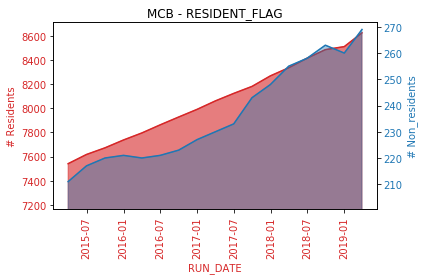

In [37]:
data1 = resident_df.RESIDENT_FLAG_N
data2 = resident_df.RESIDENT_FLAG_Y
x = resident_df.RUN_DATE
fig, ax1 = plt.subplots()
ax1.set_title(label='MCB - RESIDENT_FLAG')
min_y = min(resident_df.RESIDENT_FLAG_Y)*0.95
max_y = max(resident_df.RESIDENT_FLAG_Y)*1.01
min_n = min(resident_df.RESIDENT_FLAG_N)*0.95
max_n = max(resident_df.RESIDENT_FLAG_N)*1.01
color = 'tab:red'
ax1.set_xlabel('RUN_DATE', color=color)
ax1.set_ylabel('# Residents', color=color)
ax1.plot(x, data2, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelrotation=0)
ax1.tick_params(axis='x', labelcolor=color, labelrotation=90)
ax1.set_ylim(bottom=min_y, 
             top=max_y) 
#              emit=True, auto=False, *, ymin=None, ymax=None)
ax1.fill_between(x, resident_df.RESIDENT_FLAG_Y,
                 color=color, alpha=0.6)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# Non_residents', color=color)  # we already handled the x-label with ax1
ax2.plot(x, data1, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelrotation=0)
ax2.tick_params(axis='x', labelcolor=color, labelrotation=90)
ax2.fill_between(x, resident_df.RESIDENT_FLAG_N,
                 color=color, alpha=0.4)
ax2.set_ylim(bottom=min_n, 
             top=max_n) 
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### explore GENDER:

In [39]:
customer_df['GENDER'].value_counts()

MALE          57856
FEMALE        56504
MALE          13397
FEMALE        12950
Name: GENDER, dtype: int64

In [40]:
customer_df['GENDER'].str.strip().value_counts()

MALE      71253
FEMALE    69454
Name: GENDER, dtype: int64

In [41]:
customer_df['GENDER']=customer_df['GENDER'].str.strip()

In [42]:
customer_df['GENDER'].value_counts()

MALE      71253
FEMALE    69454
Name: GENDER, dtype: int64

#### MARITAL_STATUS_DESCRIPTION

In [43]:
customer_df['MARITAL_STATUS_DESCRIPTION'].value_counts()

MARRIED COM         67931
SINGLE              53777
WIDOWED              4008
UNMARRIED COUPLE     3092
DIVORCED             2898
MARRIED SEP          1937
Name: MARITAL_STATUS_DESCRIPTION, dtype: int64

In [44]:
marriage_df=customer_df[['RUN_DATE','MARITAL_STATUS_DESCRIPTION', 'CIR']].groupby(['RUN_DATE','MARITAL_STATUS_DESCRIPTION']).count()
marriage_df.reset_index(inplace = True)


In [46]:
marriage_df

MARITAL_STATUS_DESCRIPTION,RUN_DATE,DIVORCED,MARRIED COM,MARRIED SEP,SINGLE,UNMARRIED COUPLE,WIDOWED
0,2015-03-31,132,3691,93,2961,152,213
1,2015-06-30,144,3741,98,2977,158,212
2,2015-09-30,146,3780,101,2992,161,216
3,2015-12-31,147,3815,103,3032,163,218
4,2016-03-31,152,3842,103,3052,170,222
5,2016-06-30,153,3875,104,3083,172,226
6,2016-09-30,155,3914,105,3106,176,231
7,2016-12-30,162,3951,109,3132,180,233
8,2017-03-31,170,3990,113,3156,185,236
9,2017-06-30,172,4021,115,3183,190,237


In [45]:
marriage_df=marriage_df.pivot(index = 'RUN_DATE', columns='MARITAL_STATUS_DESCRIPTION', values='CIR').reset_index()

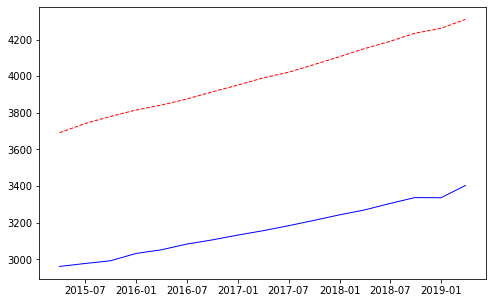

In [48]:
plt.figure(num = 3, figsize=(8, 5))
x=marriage_df.RUN_DATE
y_married=marriage_df['MARRIED COM'] 
y_single=marriage_df['SINGLE'] 
# plt.plot(x, y2)
plt.plot(x, y_married, 
         color='red',   
         linewidth=1.0,  
         linestyle='--' 
        )

plt.plot(x, y_single, 
         color='blue',   
         linewidth=1.0,  
         linestyle='-' 
        )

plt.show()

#### SALARY_AMOUNT

In [81]:
x=customer_df[customer_df['RUN_DATE']==end_date]['SALARY_AMOUNT']
# run_dates
# np.where(~customer_df[customer_df['RUN_DATE']==run_dates[0]]['SALARY_AMOUNT'].isna())

In [85]:
x

132276        0.0
132277        0.0
132278    10000.0
132279     6700.0
132280     6000.0
           ...   
141164    42000.0
141165        0.0
141166    11000.0
141167     3300.0
141168        0.0
Name: SALARY_AMOUNT, Length: 8893, dtype: float64

In [87]:
x[x>0]

132278    10000.0
132279     6700.0
132280     6000.0
132281     4500.0
132282     7300.0
           ...   
141162     7800.0
141163     5000.0
141164    42000.0
141166    11000.0
141167     3300.0
Name: SALARY_AMOUNT, Length: 5379, dtype: float64

NameError: name 'num_bins' is not defined

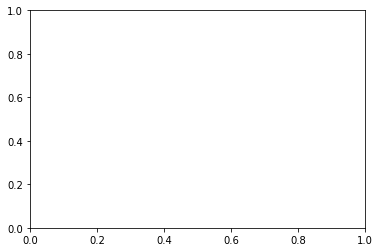

In [89]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins)

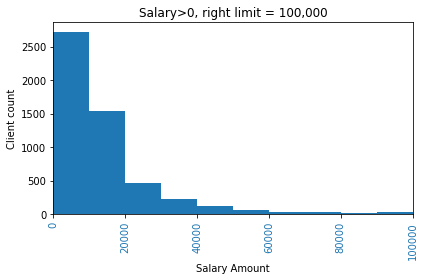

In [98]:

num_bins = 200
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x[x>0], num_bins)

# add a 'best fit' line
# y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
#      np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
# ax.plot(bins, y, '--')
ax.set_xlabel('Salary Amount')
ax.set_ylabel('Client count')
ax.set_title(r'Salary>0, right limit = 100,000')
ax.tick_params(axis='x', labelcolor=color, labelrotation=90)
ax.set_xlim(left=0, right=100000)
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

### Explore account detail:

In [49]:
account_df=pd.read_csv(filepath_or_buffer=file_path+account_fname)

In [50]:
run_dates

[Timestamp('2016-12-30 00:00:00'),
 Timestamp('2018-03-30 00:00:00'),
 Timestamp('2017-06-30 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('2017-09-29 00:00:00'),
 Timestamp('2018-12-31 00:00:00'),
 Timestamp('2017-12-29 00:00:00'),
 Timestamp('2015-06-30 00:00:00'),
 Timestamp('2015-09-30 00:00:00'),
 Timestamp('2015-03-31 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2019-03-29 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2018-09-28 00:00:00'),
 Timestamp('2018-06-29 00:00:00')]

In [51]:
list(account_df)

['Unnamed: 0',
 'RUN_DATE',
 'Customer_number',
 'loan_car_application',
 'loan_education_application',
 'loan_general_application',
 'loan_housing_application',
 'loan_personal_application']

In [52]:
account_df.pop('Unnamed: 0')
account_df.rename(columns={'Customer_number':'CIR'}, inplace = True)

In [53]:
account_df['RUN_DATE'] = pd.to_datetime(account_df['RUN_DATE'], infer_datetime_format=True)

In [54]:
set(run_dates) - set(account_df['RUN_DATE'])

set()

In [55]:
a_df=account_df[account_df.RUN_DATE==run_dates[0]]
a_df.shape

(8730, 7)

In [56]:
list(a_df)

['RUN_DATE',
 'CIR',
 'loan_car_application',
 'loan_education_application',
 'loan_general_application',
 'loan_housing_application',
 'loan_personal_application']

In [58]:
len(a_df.CIR)-len(set(a_df.CIR))

0

In [154]:
print(len(set(account_df.CIR)),len(set(customer_df.CIR)))

10000 8909


In [155]:
merge_account_df=account_df.merge(customer_df, left_on=['CIR', 'RUN_DATE'],right_on=['CIR', 'RUN_DATE'])

#### There are no 

In [159]:
len(list(merge_account_df[merge_account_df.RUN_DATE==end_date].CIR))-len(list(set(merge_account_df[merge_account_df.RUN_DATE==end_date].CIR)))

0

In [156]:
merge_account_df[merge_account_df.RUN_DATE==end_date]

,RUN_DATE,CIR,loan_car_application,loan_education_application,loan_general_application,loan_housing_application,loan_personal_application,MARKET_SEGMENT_DESCRIPTION,RESIDENT_FLAG,GENDER,MARITAL_STATUS_DESCRIPTION,SALARY_AMOUNT,NUMBER_OF_DEPENDANTS,CERTIFICATION_ACHIEVEMENT_DESCRIPTION
123213,2019-03-29,8803,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,FEMALE,SINGLE,0.0,NaN,SECONDARY COMPLETE
123214,2019-03-29,1,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,MARRIED COM,22000.0,1.0,UNIVERSITY
123215,2019-03-29,9060,NaN,NaN,NaN,NaN,NaN,MASS,Y,FEMALE,MARRIED COM,8000.0,NaN,SECONDARY INCOMPLETE
123216,2019-03-29,8637,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,MALE,SINGLE,8000.0,NaN,SECONDARY INCOMPLETE
123217,2019-03-29,2,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,MALE,SINGLE,0.0,NaN,SECONDARY INCOMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131339,2019-03-29,8541,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,MALE,SINGLE,0.0,NaN,SECONDARY INCOMPLETE
131340,2019-03-29,8802,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,SINGLE,10000.0,NaN,SECONDARY INCOMPLETE
131341,2019-03-29,8542,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,DIVORCED,30000.0,2.0,SECONDARY COMPLETE
131342,2019-03-29,8543,NaN,NaN,NaN,NaN,NaN,MASS,Y,FEMALE,MARRIED COM,0.0,4.0,SECONDARY INCOMPLETE


In [102]:
merge_account_df[merge_account_df['loan_car_application'].isna()]

,RUN_DATE,CIR,loan_car_application,loan_education_application,loan_general_application,loan_housing_application,loan_personal_application,MARKET_SEGMENT_DESCRIPTION,RESIDENT_FLAG,GENDER,MARITAL_STATUS_DESCRIPTION,SALARY_AMOUNT,NUMBER_OF_DEPENDANTS,CERTIFICATION_ACHIEVEMENT_DESCRIPTION
0,2015-03-31,1,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,MARRIED COM,NaN,1.0,UNIVERSITY
1,2015-03-31,3,NaN,NaN,NaN,NaN,NaN,MCB SELECT,Y,MALE,SINGLE,NaN,NaN,UNIVERSITY
2,2015-03-31,6,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,MARRIED COM,NaN,1.0,SECONDARY COMPLETE
3,2015-03-31,7,NaN,NaN,NaN,NaN,NaN,MASS,Y,FEMALE,MARRIED COM,NaN,3.0,NaN
4,2015-03-31,8,NaN,NaN,NaN,NaN,NaN,MASS,Y,FEMALE,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131339,2019-03-29,8541,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,MALE,SINGLE,0.0,NaN,SECONDARY INCOMPLETE
131340,2019-03-29,8802,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,SINGLE,10000.0,NaN,SECONDARY INCOMPLETE
131341,2019-03-29,8542,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,DIVORCED,30000.0,2.0,SECONDARY COMPLETE
131342,2019-03-29,8543,NaN,NaN,NaN,NaN,NaN,MASS,Y,FEMALE,MARRIED COM,0.0,4.0,SECONDARY INCOMPLETE


In [107]:
list(account_df)

['RUN_DATE',
 'CIR',
 'loan_car_application',
 'loan_education_application',
 'loan_general_application',
 'loan_housing_application',
 'loan_personal_application']

In [108]:
account_df[['loan_car_application',
 'loan_education_application',
 'loan_general_application',
 'loan_housing_application',
 'loan_personal_application']].isna().sum(axis = 0).sort_values()

loan_car_application          149273
loan_education_application    149273
loan_general_application      149273
loan_housing_application      149273
loan_personal_application     149273
dtype: int64

In [143]:
f1=account_df.RUN_DATE==end_date
f2=account_df.loan_car_application.isna()
g1=np.logical_and(f1, f2)
g2=np.logical_and(f1,~f2)
# (f1) and (f2)
noloan_cir = account_df[g1].CIR
loan_cir = account_df[g2].CIR

In [150]:
noloan_cir

140562    8803
140563       1
140564    9060
140565    8637
140566       2
          ... 
149761    8541
149762    8802
149763    8542
149764    8543
149765    8890
Name: CIR, Length: 9181, dtype: int64

In [151]:
merge_account_df[merge_account_df.RUN_DATE==end_date]

,RUN_DATE,CIR,loan_car_application,loan_education_application,loan_general_application,loan_housing_application,loan_personal_application,MARKET_SEGMENT_DESCRIPTION,RESIDENT_FLAG,GENDER,MARITAL_STATUS_DESCRIPTION,SALARY_AMOUNT,NUMBER_OF_DEPENDANTS,CERTIFICATION_ACHIEVEMENT_DESCRIPTION
123213,2019-03-29,8803,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,FEMALE,SINGLE,0.0,NaN,SECONDARY COMPLETE
123214,2019-03-29,1,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,MARRIED COM,22000.0,1.0,UNIVERSITY
123215,2019-03-29,9060,NaN,NaN,NaN,NaN,NaN,MASS,Y,FEMALE,MARRIED COM,8000.0,NaN,SECONDARY INCOMPLETE
123216,2019-03-29,8637,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,MALE,SINGLE,8000.0,NaN,SECONDARY INCOMPLETE
123217,2019-03-29,2,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,MALE,SINGLE,0.0,NaN,SECONDARY INCOMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131339,2019-03-29,8541,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,MALE,SINGLE,0.0,NaN,SECONDARY INCOMPLETE
131340,2019-03-29,8802,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,SINGLE,10000.0,NaN,SECONDARY INCOMPLETE
131341,2019-03-29,8542,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,DIVORCED,30000.0,2.0,SECONDARY COMPLETE
131342,2019-03-29,8543,NaN,NaN,NaN,NaN,NaN,MASS,Y,FEMALE,MARRIED COM,0.0,4.0,SECONDARY INCOMPLETE


In [149]:
account_df[f1]

,RUN_DATE,CIR,loan_car_application,loan_education_application,loan_general_application,loan_housing_application,loan_personal_application
140562,2019-03-29,8803,NaN,NaN,NaN,NaN,NaN
140563,2019-03-29,1,NaN,NaN,NaN,NaN,NaN
140564,2019-03-29,9060,NaN,NaN,NaN,NaN,NaN
140565,2019-03-29,8637,NaN,NaN,NaN,NaN,NaN
140566,2019-03-29,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
149761,2019-03-29,8541,NaN,NaN,NaN,NaN,NaN
149762,2019-03-29,8802,NaN,NaN,NaN,NaN,NaN
149763,2019-03-29,8542,NaN,NaN,NaN,NaN,NaN
149764,2019-03-29,8543,NaN,NaN,NaN,NaN,NaN


In [148]:
account_df[g1][['loan_car_application',
 'loan_education_application',
 'loan_general_application',
 'loan_housing_application',
 'loan_personal_application']].shape

(9181, 5)

In [61]:
account_df.loan_general_application.value_counts(dropna=False)

NaN    149273
0.0       425
9.0        31
2.0         9
6.0         8
1.0         5
8.0         5
5.0         3
4.0         3
7.0         2
3.0         2
Name: loan_general_application, dtype: int64

### Explore transaction detail:

#### Read the transaction file:

In [103]:
transaction_df=pd.read_csv(filepath_or_buffer=file_path+transaction_fname)

In [104]:
list(transaction_df)

['CIR',
 'RUN_Date',
 'sum.amt_Bank Draft_N',
 'sum.amt_Bank Fee_N',
 'sum.amt_Bundle Fee_N',
 'sum.amt_Cash Depo_N',
 'sum.amt_Cash Out_N',
 'sum.amt_Cheque_N',
 'sum.amt_Contra Entry_N',
 'sum.amt_Cr Intr_N',
 'sum.amt_Db Intr_N',
 'sum.amt_Direct Db_N',
 'sum.amt_FD Maturity_N',
 'sum.amt_FD Pre Closure_N',
 'sum.amt_FD Set Up_N',
 'sum.amt_Failed Direct Db_N',
 'sum.amt_Ignore_N',
 'sum.amt_Income_N',
 'sum.amt_Insurance_N',
 'sum.amt_Intr_N',
 'sum.amt_Inward Trnf_N',
 'sum.amt_Loan Repay_N',
 'sum.amt_Locker Depo_N',
 'sum.amt_Merchant Stlmt_N',
 'sum.amt_MoneyGram_N',
 'sum.amt_Others_N',
 'sum.amt_Out. Trnf_N',
 'sum.amt_Past Due_N',
 'sum.amt_Payment_N',
 'sum.amt_Refill_N',
 'sum.amt_Reject_N',
 'sum.amt_Securities_N',
 'sum.amt_Securities Purchase_N',
 'sum.amt_Securities Sale_N',
 'sum.amt_Stdin Order_N',
 'sum.amt_Trnf_N',
 'sum.amt_Unpaid Fee_N',
 'sum.amt_NA_N',
 'sum.amt_NA_P']

In [106]:
# set(customer_df.RUN_DATE)
8890
transaction_df[transaction_df.CIR==8890]

,CIR,RUN_Date,sum.amt_Bank Draft_N,sum.amt_Bank Fee_N,sum.amt_Bundle Fee_N,sum.amt_Cash Depo_N,sum.amt_Cash Out_N,sum.amt_Cheque_N,sum.amt_Contra Entry_N,sum.amt_Cr Intr_N,...,sum.amt_Refill_N,sum.amt_Reject_N,sum.amt_Securities_N,sum.amt_Securities Purchase_N,sum.amt_Securities Sale_N,sum.amt_Stdin Order_N,sum.amt_Trnf_N,sum.amt_Unpaid Fee_N,sum.amt_NA_N,sum.amt_NA_P
66030,8890,2016.00,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,-130.44,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66031,8890,2016.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-86.96,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66032,8890,2016.50,0.0,-3.5,0.0,0.0,0.0,0.0,0.0,0.0,...,-304.36,-1870.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66033,8890,2016.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-173.92,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66034,8890,2017.25,0.0,-1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,-130.44,-800.00,0.0,0.0,0.0,0.0,-600.0,0.0,0.0,0.0
66035,8890,2017.50,0.0,-2.0,0.0,0.0,-60000.0,0.0,0.0,0.0,...,0.00,-800.00,0.0,0.0,0.0,0.0,-1500.0,0.0,0.0,0.0
66036,8890,2017.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,-1000.00,0.0,0.0,0.0,0.0,-3500.0,0.0,0.0,0.0
66037,8890,2018.00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-130.44,-10098.00,0.0,0.0,0.0,0.0,-15655.0,0.0,0.0,0.0
66038,8890,2018.25,0.0,-1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,-260.88,-979.19,0.0,0.0,0.0,0.0,-1300.0,0.0,0.0,0.0
66039,8890,2018.50,0.0,-1.0,0.0,0.0,-57000.0,0.0,0.0,0.0,...,-217.40,0.00,0.0,0.0,0.0,0.0,-4055.0,0.0,0.0,0.0


In [136]:
transaction_df['RUN_DATE_']=transaction_df.RUN_Date.apply(frac2date)

In [137]:
set(transaction_df['RUN_DATE_'])

{Timestamp('2015-03-01 00:00:00'),
 Timestamp('2015-06-01 00:00:00'),
 Timestamp('2015-09-01 00:00:00'),
 Timestamp('2015-12-01 00:00:00'),
 Timestamp('2016-03-01 00:00:00'),
 Timestamp('2016-06-01 00:00:00'),
 Timestamp('2016-09-01 00:00:00'),
 Timestamp('2016-12-01 00:00:00'),
 Timestamp('2017-03-01 00:00:00'),
 Timestamp('2017-06-01 00:00:00'),
 Timestamp('2017-09-01 00:00:00'),
 Timestamp('2017-12-01 00:00:00'),
 Timestamp('2018-03-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00')}

In [138]:
transaction_df['RUN_DATE']=transaction_df['RUN_DATE_'].apply(bmonth_end_fn)

In [139]:
df=transaction_df[transaction_df.RUN_DATE==end_date]

In [162]:
cluster_df=df[['sum.amt_Bank Draft_N',
 'sum.amt_Bank Fee_N',
 'sum.amt_Bundle Fee_N',
 'sum.amt_Cash Depo_N',
 'sum.amt_Cash Out_N',
 'sum.amt_Cheque_N',
 'sum.amt_Contra Entry_N',
#  'sum.amt_Cr Intr_N',
 'sum.amt_Db Intr_N',
 'sum.amt_Direct Db_N',
 'sum.amt_FD Maturity_N',
 'sum.amt_FD Pre Closure_N',
 'sum.amt_FD Set Up_N',
 'sum.amt_Failed Direct Db_N',
 'sum.amt_Ignore_N',
#  'sum.amt_Income_N',
 'sum.amt_Insurance_N',
 'sum.amt_Intr_N',
 'sum.amt_Inward Trnf_N',
 'sum.amt_Loan Repay_N',
 'sum.amt_Locker Depo_N',
 'sum.amt_Merchant Stlmt_N',
 'sum.amt_MoneyGram_N',
 'sum.amt_Others_N',
 'sum.amt_Out. Trnf_N',
 'sum.amt_Past Due_N',
 'sum.amt_Payment_N',
 'sum.amt_Refill_N',
 'sum.amt_Reject_N',
 'sum.amt_Securities_N',
 'sum.amt_Securities Purchase_N',
 'sum.amt_Securities Sale_N',
 'sum.amt_Stdin Order_N',
 'sum.amt_Trnf_N',
 'sum.amt_Unpaid Fee_N',
 'sum.amt_NA_N',
 'sum.amt_NA_P']]

In [164]:
transaction_df['RUN_Date']

0         2015.00
1         2015.25
2         2015.50
3         2015.75
4         2016.00
           ...   
113123    2019.00
113124    2019.00
113125    2019.00
113126    2019.00
113127    2019.00
Name: RUN_Date, Length: 113128, dtype: float64

In [165]:
cluster_df.values

array([[    0. , -1345. ,     0. , ...,     0. ,     0. ,     0. ],
       [    0. ,   -82.5,     0. , ...,     0. ,     0. ,     0. ],
       [    0. ,  -588.5,     0. , ...,     0. ,     0. ,     0. ],
       ...,
       [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
       [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
       [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ]])

In [ ]:
int((transaction_df.RUN_Date[2]-np.floor(transaction_df.RUN_Date[2]))*12)

In [ ]:
run_date_dict={}
run_date_dict['2015.00']=datetime(2015,3,31)
run_date_dict['2015.25']=datetime(2015,6,30)
run_date_dict['2015.50']=datetime(2015,9,30)
run_date_dict['2015.75']=datetime(2015,6,30)

In [ ]:
run_date_dict

In [ ]:


d=date.today()

offset = BMonthEnd()

#Last day of current month
offset.rollforward(d)

In [ ]:
temp_dates=list(set(gf['RUN_DATE']))

In [ ]:
temp_dates[0]

In [ ]:
for d in temp_dates:
    offset = BMonthEnd()
    #Last day of current month
    print(offset.rollforward(d))

In [ ]:
set(gf['RUN_DATE'])

In [ ]:
transaction_df['RUN_Date']

###  Do a review of all data:

In [ ]:
transaction_df[transaction_df.RUN_DATE==run_dates[0]]

In [ ]:
account_df[account_df.loan_car_application==0]

In [ ]:
CIR=7369
account_df[account_df.CIR==CIR]

In [ ]:
list(transaction_df)


In [ ]:
transaction_df[transaction_df.CIR==CIR]

In [ ]:
transaction_df[transaction_df.CIR==245][['sum.amt_Loan Repay_N', 'sum.amt_Cr Intr_N',
 'sum.amt_Db Intr_N', 'sum.amt_Direct Db_N','RUN_DATE']]

In [132]:
list(transaction_df)

['CIR',
 'RUN_Date',
 'sum.amt_Bank Draft_N',
 'sum.amt_Bank Fee_N',
 'sum.amt_Bundle Fee_N',
 'sum.amt_Cash Depo_N',
 'sum.amt_Cash Out_N',
 'sum.amt_Cheque_N',
 'sum.amt_Contra Entry_N',
 'sum.amt_Cr Intr_N',
 'sum.amt_Db Intr_N',
 'sum.amt_Direct Db_N',
 'sum.amt_FD Maturity_N',
 'sum.amt_FD Pre Closure_N',
 'sum.amt_FD Set Up_N',
 'sum.amt_Failed Direct Db_N',
 'sum.amt_Ignore_N',
 'sum.amt_Income_N',
 'sum.amt_Insurance_N',
 'sum.amt_Intr_N',
 'sum.amt_Inward Trnf_N',
 'sum.amt_Loan Repay_N',
 'sum.amt_Locker Depo_N',
 'sum.amt_Merchant Stlmt_N',
 'sum.amt_MoneyGram_N',
 'sum.amt_Others_N',
 'sum.amt_Out. Trnf_N',
 'sum.amt_Past Due_N',
 'sum.amt_Payment_N',
 'sum.amt_Refill_N',
 'sum.amt_Reject_N',
 'sum.amt_Securities_N',
 'sum.amt_Securities Purchase_N',
 'sum.amt_Securities Sale_N',
 'sum.amt_Stdin Order_N',
 'sum.amt_Trnf_N',
 'sum.amt_Unpaid Fee_N',
 'sum.amt_NA_N',
 'sum.amt_NA_P']